In [64]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
#plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [3]:
!tree -dL 2 aclImdb

aclImdb
├── test
│   ├── neg
│   └── pos
└── train
    ├── neg
    └── pos

6 directories


In [5]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_trainval, y_trainval = reviews_train.data, reviews_train.target
print("type of text_trainval: {}".format(type(text_trainval)))
print("length of text_trainval: {}".format(len(text_trainval)))
print("text_trainval[1]:\n{}".format(text_trainval[1].decode()))

type of text_trainval: <class 'list'>
length of text_trainval: 25000
text_trainval[1]:
Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" sh

In [6]:
print(text_train[11451].decode())

... than this ;-) What would happen if Terry Gilliam and Douglas Adams would have worked together on one movie? This movie starts with a touch of Brazil... when, at a certain point, the story moves straight into the twilight zone... bringing up nothing new, but just nothing... and nothing is great fun! When Dave and Andrew starts to explore their new environment the movie gets really enjoyable... bouncing heads? well... yes ;-) <br /><br />anyway... this movie was, imho, the biggest surprise at this year's FantasyFilmFest...<br /><br />Just like in Cube and Cypher Natali gave this one a minimalistic, weird but very special design, which makes it hard to locate the place of the story or its time... timeless somehow...


In [7]:
print(text_train[16019].decode())

**May Contain Spoilers**<br /><br />A dude in a dopey-looking Kong suit (the same one used in KING KONG VS. GODZILLA in 1962) provides much of the laffs in this much-mocked monster flick. Kong is resurrected on Mondo Island and helps out the lunkhead hero and other good guys this time around. The vampire-like villain is named Dr. Who-funny, he doesn't look like Peter Cushing! Kong finally dukes it out with Who's pride and joy, a giant robot ape that looks like a bad metal sculpture of Magilla Gorilla. Like many of Honda's flicks this may have had some merit before American audiences diddled around with it and added new footage. The Rankin/Bass animation company had a hand in this mess. They should have stuck to superior children's programs like The Little Drummer Boy.


In [8]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

# Get some data from european parliament

In [16]:
import xml.etree.ElementTree as ET

In [17]:
import requests

In [18]:
response = requests.get("http://www.europarl.europa.eu/meps/en/xml.html?query=full&filter=all")

In [19]:
data_xml = ET.fromstring(response.text)

In [20]:
members_xml = data_xml.getchildren()

In [21]:
members_dict = [{i.tag: i.text for i in member} for member in members_xml]
members = pd.DataFrame(members_dict)

In [22]:
members.head()

,country,fullName,id,nationalPoliticalGroup,politicalGroup
0,Sweden,Lars ADAKTUSSON,124990,Kristdemokraterna,Group of the European People's Party (Christia...
1,Bulgaria,Asim ADEMOV,189525,Citizens for European Development of Bulgaria,Group of the European People's Party (Christia...
2,Italy,Isabella ADINOLFI,124831,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group
3,Italy,Marco AFFRONTE,124797,Independent,Group of the Greens/European Free Alliance
4,Italy,Laura AGEA,124811,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group


In [23]:
malory = ["Do you want ants?",
          "Because that’s how you get ants."]

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']


In [25]:
X = vect.transform(malory)
X

<2x8 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [26]:
X.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [27]:
print(malory)
print(vect.inverse_transform(X)[0])
print(vect.inverse_transform(X)[1])

['Do you want ants?', 'Because that’s how you get ants.']
['ants' 'do' 'want' 'you']
['ants' 'because' 'get' 'how' 'that' 'you']


# Classification example

In [28]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_trainval, y_trainval = reviews_train.data, reviews_train.target
print("type of text_trainval: {}".format(type(text_trainval)))
print("length of text_trainval: {}".format(len(text_trainval)))
print("text_trainval[1]:\n{}".format(text_trainval[1].decode()))

type of text_trainval: <class 'list'>
length of text_trainval: 25000
text_trainval[1]:
Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clichés, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won't list them here, but just mention the coloring of the plane. They didn't even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys' side all the time in the movie, because the good guys were so stupid. "Executive Decision" sh

In [29]:
text_trainval = [doc.replace(b"<br />", b" ") for doc in text_trainval]

text_train, text_val, y_train, y_val = train_test_split(
    text_trainval, y_trainval, stratify=y_trainval, random_state=0)
vect = CountVectorizer()
X_train = vect.fit_transform(text_train)
X_val = vect.transform(text_val)

In [30]:
X_train

<18750x66651 sparse matrix of type '<class 'numpy.int64'>'
	with 2569474 stored elements in Compressed Sparse Row format>

In [31]:
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007']
['eschews', 'escort', 'escorted', 'escorting', 'escorts', 'escpecially', 'escreve', 'escrow', 'esculator', 'ese', 'eser', 'esha', 'eshaan', 'eshley', 'esk', 'eskimo', 'eskimos', 'esmerelda', 'esmond', 'esophagus']
['00', 'ahoy', 'aspects', 'belting', 'bridegroom', 'cements', 'commas', 'crowds', 'detlef', 'druids', 'eschews', 'finishing', 'gathering', 'gunrunner', 'homesickness', 'inhumanities', 'kabbalism', 'leech', 'makes', 'miki', 'nas', 'organ', 'pesci', 'principally', 'rebours', 'robotnik', 'sculptural', 'skinkons', 'stardom', 'syncer', 'tools', 'unflagging', 'waaaay', 'yanks']


In [32]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV().fit(X_train, y_train)

In [36]:
lr.C_

array([ 1291.55])

In [37]:
lr.score(X_val, y_val)

0.88192000000000004

In [110]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

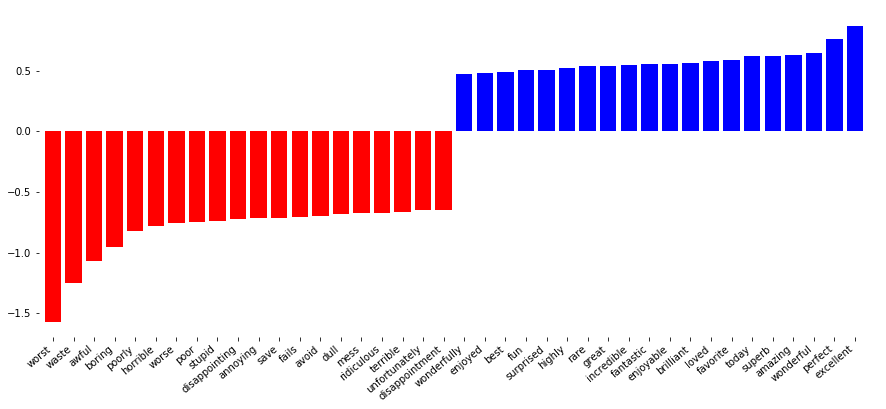

In [71]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(feature_names), top_n=20, rotation=40)
ax = plt.gca()
plt.savefig("images/coefficients.png")


# Vectorization options

In [72]:
print(vect.token_pattern)

(?u)\b\w\w+\b


In [73]:
vect = CountVectorizer(token_pattern=r"\b\w+\b")
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'because', 'do', 'get', 'how', 's', 'that', 'want', 'you']


In [74]:
vect = CountVectorizer(token_pattern=r"\b\w[\w’]+\b")
# not actually an apostroph but some unicode pattern
# because I copy & pasted the quote
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'because', 'do', 'get', 'how', 'that’s', 'want', 'you']


In [75]:
vect = CountVectorizer(stop_words='english')
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'want']


In [76]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(list(ENGLISH_STOP_WORDS))

['whose', 'he', 'over', 'into', 'cant', 'mine', 'somewhere', 'them', 'whatever', 'here', 'move', 'that', 'con', 'became', 'further', 'beyond', 'whom', 'un', 'on', 'once', 'sincere', 'still', 'inc', 'through', 'ltd', 'fill', 'have', 'even', 'bill', 'forty', 'six', 'moreover', 'somehow', 'twelve', 'whereby', 'their', 'very', 'it', 'give', 'empty', 'thereafter', 'well', 'last', 'ten', 'mill', 'himself', 'fire', 'may', 'whoever', 'what', 'latterly', 'someone', 'me', 'thick', 'thin', 'whereafter', 'why', 'myself', 'before', 'down', 'they', 'detail', 'go', 'how', 'bottom', 'an', 'hers', 'as', 'i', 'off', 'same', 'indeed', 'together', 'front', 'nothing', 'whether', 'yourself', 'else', 'him', 'beside', 'find', 'almost', 'ourselves', 'are', 'eleven', 'because', 'for', 'rather', 'our', 'but', 'could', 'anywhere', 'only', 'than', 'few', 'hasnt', 'since', 'take', 'part', 'herein', 'within', 'thence', 'seeming', 'enough', 'onto', 'top', 'made', 'already', 'to', 'after', 'whole', 'your', 'sometimes'

In [77]:
"well" in ENGLISH_STOP_WORDS

True

In [78]:
vect = CountVectorizer(min_df=2)
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'you']


In [79]:
vect = CountVectorizer(max_features=4)
vect.fit(malory)
print(vect.get_feature_names())

['ants', 'because', 'do', 'you']


In [81]:
vect = CountVectorizer(min_df=2)
X_train_df2 = vect.fit_transform(text_train)
X_val_df2 = vect.transform(text_val)
print(X_train.shape)
print(X_train_df2.shape)

(18750, 66651)
(18750, 39824)


In [82]:
vect = CountVectorizer(min_df=4)
X_train_df4 = vect.fit_transform(text_train)
X_val_df4 = vect.transform(text_val)
print(X_train.shape)
print(X_train_df2.shape)
print(X_train_df4.shape)

(18750, 66651)
(18750, 39824)
(18750, 26927)


In [83]:
lr = LogisticRegressionCV().fit(X_train_df4, y_train)

In [84]:
lr.C_

array([ 0.046])

In [85]:
lr.score(X_val_df4, y_val)

0.88063999999999998

# n-grams

In [86]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 8
Vocabulary:
['ants', 'because', 'do', 'get', 'how', 'that', 'want', 'you']


In [87]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 8
Vocabulary:
['because that', 'do you', 'get ants', 'how you', 'that how', 'want ants', 'you get', 'you want']


In [88]:
cv = CountVectorizer(ngram_range=(1, 2)).fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 16
Vocabulary:
['ants', 'because', 'because that', 'do', 'do you', 'get', 'get ants', 'how', 'how you', 'that', 'that how', 'want', 'want ants', 'you', 'you get', 'you want']


In [90]:
for ngram_range in [(1, 1), (1, 2), (1, 3), (1, 4)]:
    
    cv = CountVectorizer(ngram_range=ngram_range, min_df=4).fit(text_train)
    print("Vocabulary size {} (min_df=4): {}".format(ngram_range, len(cv.vocabulary_)))

Vocabulary size (1, 1) (min_df=4): 26927
Vocabulary size (1, 2) (min_df=4): 154021
Vocabulary size (1, 3) (min_df=4): 249159
Vocabulary size (1, 4) (min_df=4): 280744


In [54]:
cv = CountVectorizer(ngram_range=(1, 4)).fit(text_train_sub)
print("Vocabulary size 1-4gram: {}".format(len(cv.vocabulary_)))

Vocabulary size 1-4gram: 7815528


In [57]:
cv = CountVectorizer(ngram_range=(1, 2), min_df=4).fit(text_train_sub)
print("Vocabulary size (1, 2), min_df=4: {}".format(len(cv.vocabulary_)))
cv = CountVectorizer(ngram_range=(1, 2), min_df=4, stop_words="english").fit(text_train_sub)
print("Vocabulary size (1, 2), stopwords, min_df=4: {}".format(len(cv.vocabulary_)))

Vocabulary size (1, 2), min_df=4: 155354
Vocabulary size (1, 2), stopwords, min_df=4: 81085


In [92]:
cv4 = CountVectorizer(ngram_range=(4, 4), min_df=4).fit(text_train)
cv4sw = CountVectorizer(ngram_range=(4, 4), min_df=4, stop_words="english").fit(text_train)
print(len(cv4.get_feature_names()))
print(len(cv4sw.get_feature_names()))

31585
369


In [70]:
print(cv4.get_feature_names()[::1000])

['10 from the fiend', 'and enjoy the ride', 'anything positive about this', 'bad film but it', 'but that was all', 'deserve to be in', 'face of the earth', 'for this film as', 'has his own problems', 'if it weren for', 'in the life of', 'is not about the', 'it is billed as', 'just don watch it', 'making it look like', 'much of the dialogue', 'of most of the', 'often the case with', 'part of the show', 'see it again and', 'supposed to be the', 'the acting is ok', 'the film is obviously', 'the movie to be', 'the story was written', 'things going for it', 'this movie then you', 'to focus on the', 'to watch this and', 'was so bad was', 'when was little and', 'yet another example of']


In [76]:
print(cv4sw.get_feature_names()[::10])

['10 year old boy', 'academy award best actor', 'aka gft amazon reviewer', 'bad acting bad special', 'best films ve seen', 'cain postman rings twice', 'crouching tiger hidden dragon', 'didn make lot sense', 'dolby digital surround sound', 'don waste time film', 'edward furlong christina ricci', 'film does good job', 'friday morning sunday night', 'good night good luck', 'jack black ben stiller', 'joe buck jon voight', 'just gets better better', 'left cutting room floor', 'look like citizen kane', 'low budget sci fi', 'michael caine christopher reeve', 'movie based true story', 'movie seen long time', 'movies ve seen long', 'nominated best supporting actor', 'perry smith dick hickock', 'points 100 imdb 10', 'prince albert rupert friend', 'really wanted like film', 'saint quentin en yvelines', 'seen lot bad movies', 'sounds like great idea', 'taylor aka gft amazon', 'university paris pantheon sorbonne', 've seen ve seen', 'wasting 90 minutes life', 'worst movie seen entire']


In [93]:
bla = cv4sw.transform(text_train)

In [100]:
print(np.array(cv4sw.get_feature_names())[np.argsort(np.array(bla.sum(axis=0)).ravel())[::-1][:50]])

['worst movie ve seen' '40 year old virgin' 've seen long time'
 'worst movies ve seen' 'don waste time money'
 'mystery science theater 3000' 'worst film ve seen'
 'lose friends alienate people' 'best movies ve seen'
 'don waste time watching' 'jean claude van damme'
 'really wanted like movie' 'best movie ve seen' 'rock roll high school'
 'don think ve seen' 'let face music dance' 'don say didn warn'
 'worst films ve seen' 'fred astaire ginger rogers' 'ha ha ha ha'
 'la maman et la' 'maman et la putain' 'left cutting room floor'
 've seen ve seen' 'just doesn make sense' 'robert blake scott wilson'
 'late 70 early 80' 'crouching tiger hidden dragon' 'low budget sci fi'
 'movie ve seen long' 'toronto international film festival'
 'night evelyn came grave' 'good guys bad guys' 'low budget horror movies'
 'waste time watching movie' 'vote seven title brazil' 'bad bad bad bad'
 'morning sunday night monday' '14 year old girl' 'film based true story'
 'don make em like' 'silent night dead

In [101]:
pd.Series("".join(cv4sw.get_feature_names()).split()).value_counts()[:10]

seen     31
ve       31
bad      21
good     17
movie    16
make     12
waste    12
time     11
film     10
worst    10
dtype: int64

In [103]:
vect3 = CountVectorizer(ngram_range=(1, 3), min_df=4)
X_train3 = vect3.fit_transform(text_train)

In [104]:
lr3 = LogisticRegressionCV().fit(X_train3, y_train)

In [105]:
lr3.C_

array([ 0.359])

In [106]:
X_val3 = vect3.transform(text_val)
lr3.score(X_val3, y_val)

0.88959999999999995

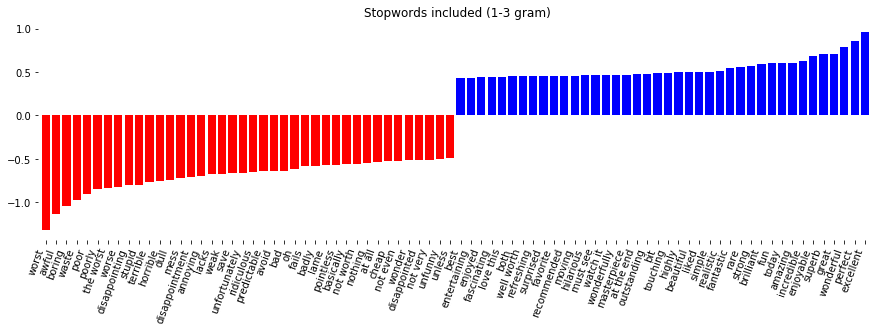

In [111]:
plt.figure(figsize=(15, 4))
plot_important_features(lr3.coef_.ravel(), np.array(vect3.get_feature_names()), top_n=40, rotation=70)
plt.title("Stopwords included (1-3 gram)")
plt.savefig("images/stopwords_1.png")

In [113]:
vect3sw = CountVectorizer(ngram_range=(1, 3), min_df=4, stop_words='english')
X_train3sw = vect3sw.fit_transform(text_train)
lr3sw = LogisticRegressionCV().fit(X_train3sw, y_train)
X_val3sw = vect3sw.transform(text_val)
lr3sw.score(X_val3sw, y_val)

0.88351999999999997

In [114]:
lr.C_

array([ 0.046])

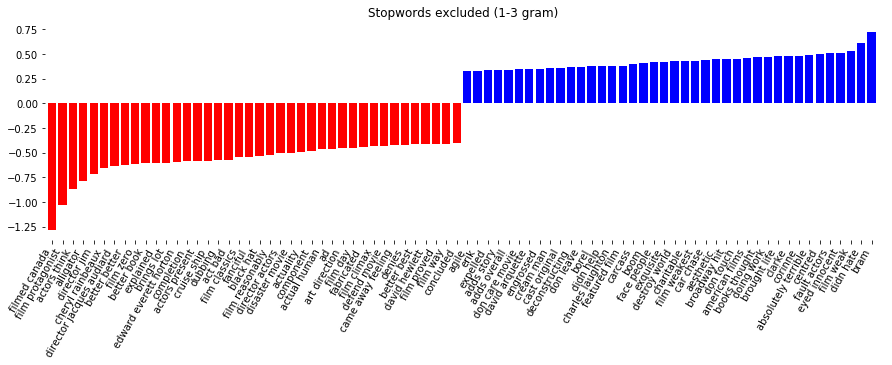

In [115]:
plt.figure(figsize=(15, 4))
plot_important_features(lr.coef_.ravel(), np.array(vect3sw.get_feature_names()), top_n=40)
plt.title("Stopwords excluded (1-3 gram)")
plt.savefig("images/stopwords_2.png")

In [122]:
my_stopwords = set(ENGLISH_STOP_WORDS)
my_stopwords.remove("well")
my_stopwords.remove("not")
my_stopwords.add("ve")

In [125]:
vect3msw = CountVectorizer(ngram_range=(1, 3), min_df=4, stop_words=my_stopwords)
X_train3msw = vect3msw.fit_transform(text_train_sub)
lr3msw = LogisticRegressionCV().fit(X_train3msw, y_train_sub)
X_val3msw = vect3msw.transform(text_val)
lr3msw.score(X_val3msw, y_val)

0.88319999999999999

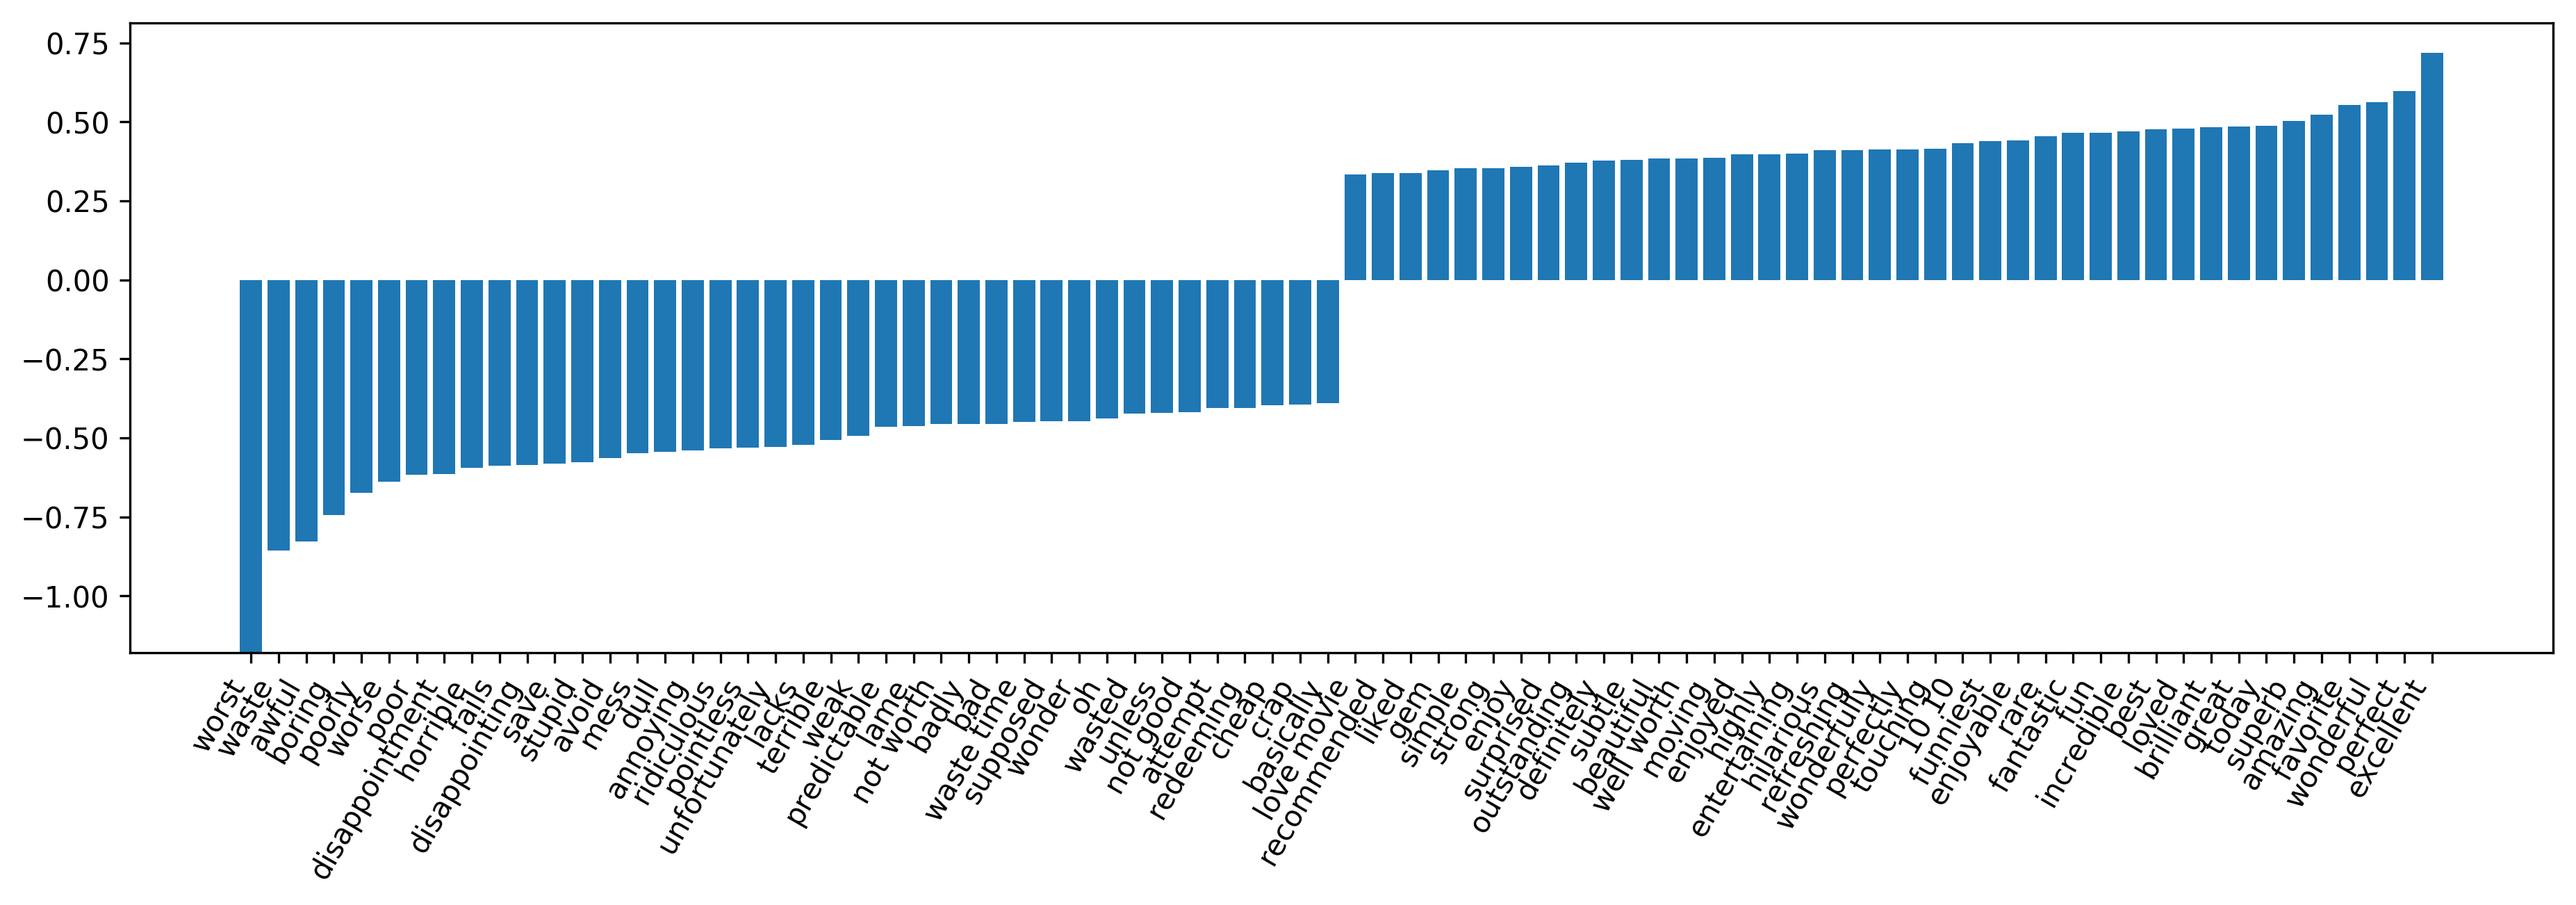

In [127]:
plt.figure(figsize=(15, 4))
plot_important_features(lr3msw.coef_.ravel(), np.array(vect3msw.get_feature_names()), top_n=40)

# TF-IDF

In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [144]:
malory_tfidf = TfidfVectorizer().fit_transform(malory)
malory_tfidf.toarray()

array([[ 0.41 ,  0.   ,  0.576,  0.   ,  0.   ,  0.   ,  0.576,  0.41 ],
       [ 0.318,  0.447,  0.   ,  0.447,  0.447,  0.447,  0.   ,  0.318]])

In [146]:
malory_tfidf = make_pipeline(CountVectorizer(), TfidfTransformer()).fit_transform(malory)
malory_tfidf.toarray()

array([[ 0.41 ,  0.   ,  0.576,  0.   ,  0.   ,  0.   ,  0.576,  0.41 ],
       [ 0.318,  0.447,  0.   ,  0.447,  0.447,  0.447,  0.   ,  0.318]])

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1, 3), min_df=4, stop_words=my_stopwords)
X_train_tfidf = tfidf.fit_transform(text_train_sub)
lr = LogisticRegressionCV().fit(X_train_tfidf, y_train_sub)
X_val_tfidf = tfidf.transform(text_val)
lr.score(X_val_tfidf, y_val)

0.88895999999999997

# Character n-grams

In [151]:
print(malory)

['Do you want ants?', 'Because that’s how you get ants.']


In [149]:
cv = CountVectorizer(ngram_range=(2, 3), analyzer="char").fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 73
Vocabulary:
[' a', ' an', ' g', ' ge', ' h', ' ho', ' t', ' th', ' w', ' wa', ' y', ' yo', 'an', 'ant', 'at', 'at’', 'au', 'aus', 'be', 'bec', 'ca', 'cau', 'do', 'do ', 'e ', 'e t', 'ec', 'eca', 'et', 'et ', 'ge', 'get', 'ha', 'hat', 'ho', 'how', 'nt', 'nt ', 'nts', 'o ', 'o y', 'ou', 'ou ', 'ow', 'ow ', 's ', 's h', 's.', 's?', 'se', 'se ', 't ', 't a', 'th', 'tha', 'ts', 'ts.', 'ts?', 't’', 't’s', 'u ', 'u g', 'u w', 'us', 'use', 'w ', 'w y', 'wa', 'wan', 'yo', 'you', '’s', '’s ']


In [150]:
cv = CountVectorizer(ngram_range=(2, 3), analyzer="char_wb").fit(malory)
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size: 74
Vocabulary:
[' a', ' an', ' b', ' be', ' d', ' do', ' g', ' ge', ' h', ' ho', ' t', ' th', ' w', ' wa', ' y', ' yo', '. ', '? ', 'an', 'ant', 'at', 'at’', 'au', 'aus', 'be', 'bec', 'ca', 'cau', 'do', 'do ', 'e ', 'ec', 'eca', 'et', 'et ', 'ge', 'get', 'ha', 'hat', 'ho', 'how', 'nt', 'nt ', 'nts', 'o ', 'ou', 'ou ', 'ow', 'ow ', 's ', 's.', 's. ', 's?', 's? ', 'se', 'se ', 't ', 'th', 'tha', 'ts', 'ts.', 'ts?', 't’', 't’s', 'u ', 'us', 'use', 'w ', 'wa', 'wan', 'yo', 'you', '’s', '’s ']


In [152]:
char_vect = CountVectorizer(ngram_range=(2, 5), min_df=4, analyzer="char_wb")
X_train_char = char_vect.fit_transform(text_train_sub)

In [153]:
len(char_vect.vocabulary_)

164632

In [154]:
lr_char = LogisticRegressionCV().fit(X_train_char, y_train_sub)
X_val_char = char_vect.transform(text_val)
lr_char.score(X_val_char, y_val)

0.88112000000000001

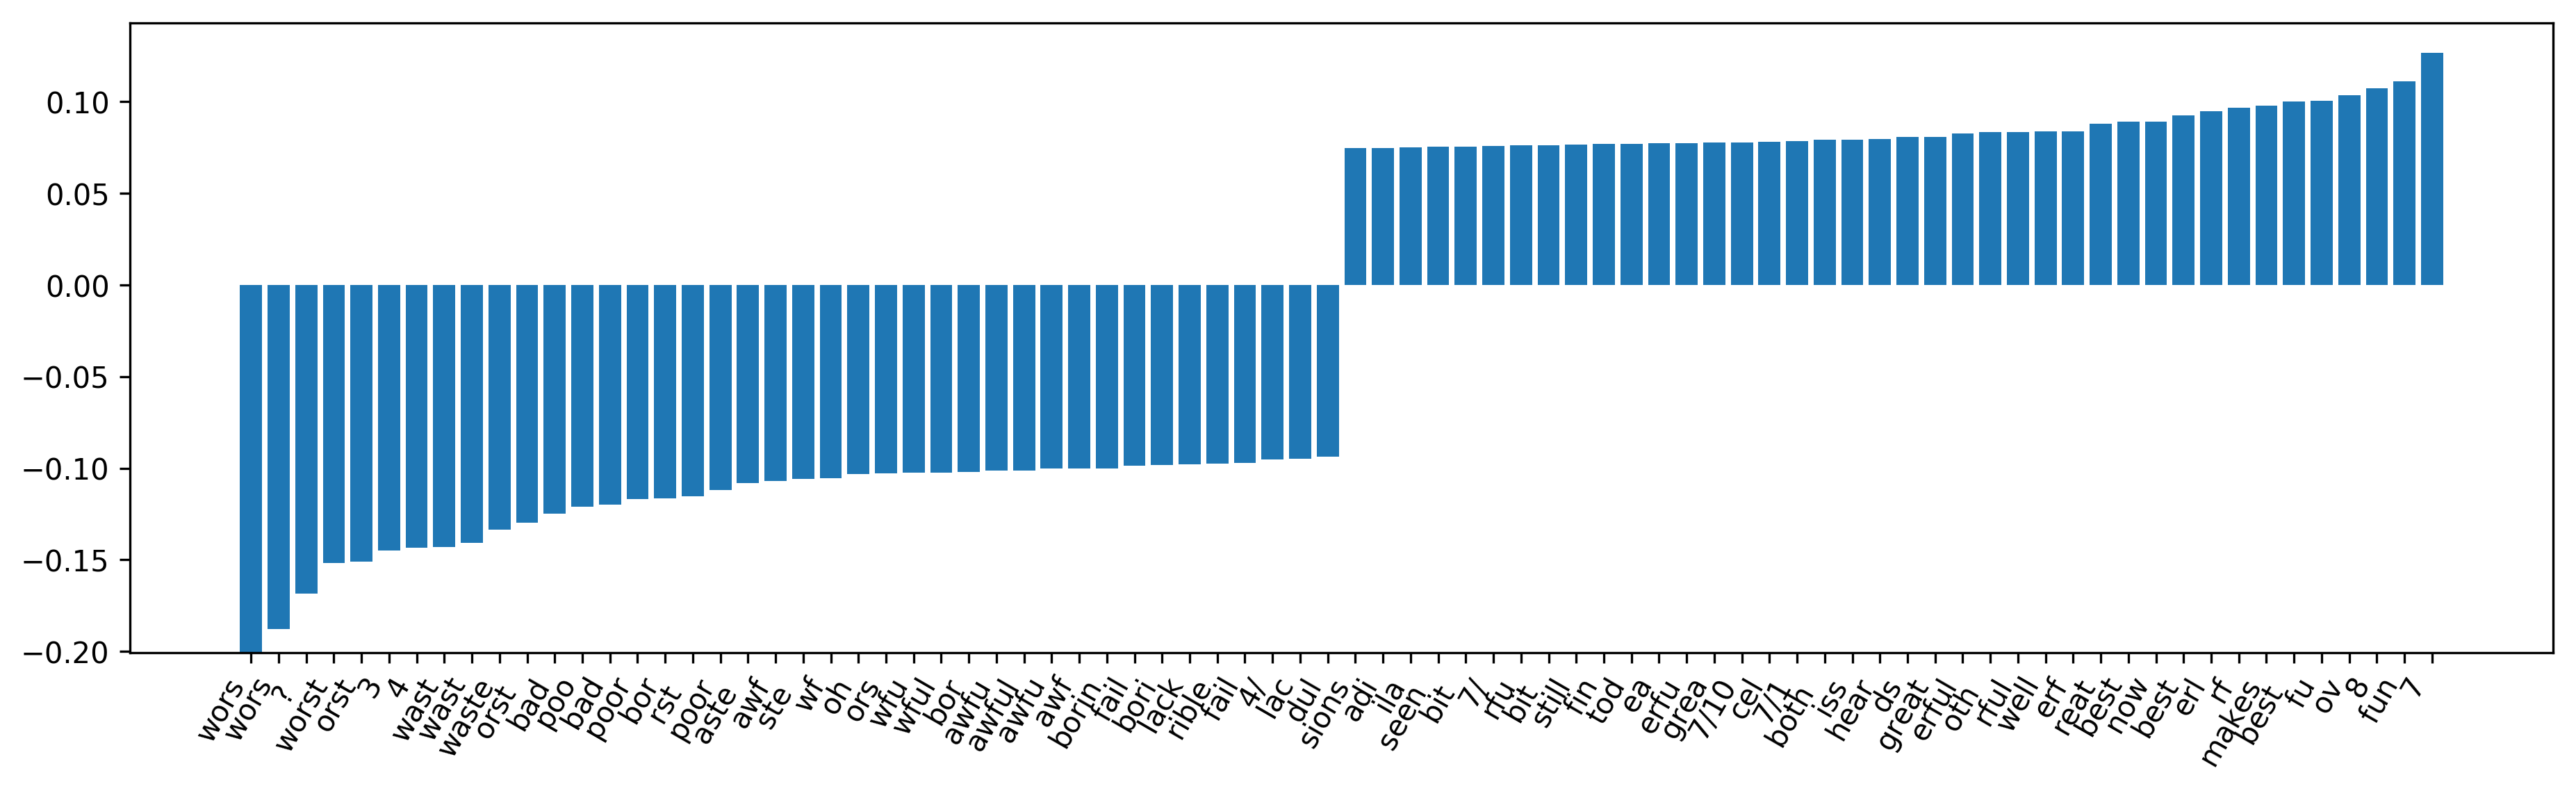

In [163]:
plt.figure(figsize=(15, 4))
plot_important_features(lr_char.coef_.ravel(), np.array(char_vect.get_feature_names()), top_n=40)

# Predicting nationalities from names

In [162]:
members.head()

,country,fullName,id,nationalPoliticalGroup,politicalGroup
0,Sweden,Lars ADAKTUSSON,124990,Kristdemokraterna,Group of the European People's Party (Christia...
1,Italy,Isabella ADINOLFI,124831,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group
2,Italy,Marco AFFRONTE,124797,Movimento 5 Stelle,Group of the Greens/European Free Alliance
3,Italy,Laura AGEA,124811,Movimento 5 Stelle,Europe of Freedom and Direct Democracy Group
4,United Kingdom,John Stuart AGNEW,96897,United Kingdom Independence Party,Europe of Freedom and Direct Democracy Group


In [172]:
members.shape

(750, 5)

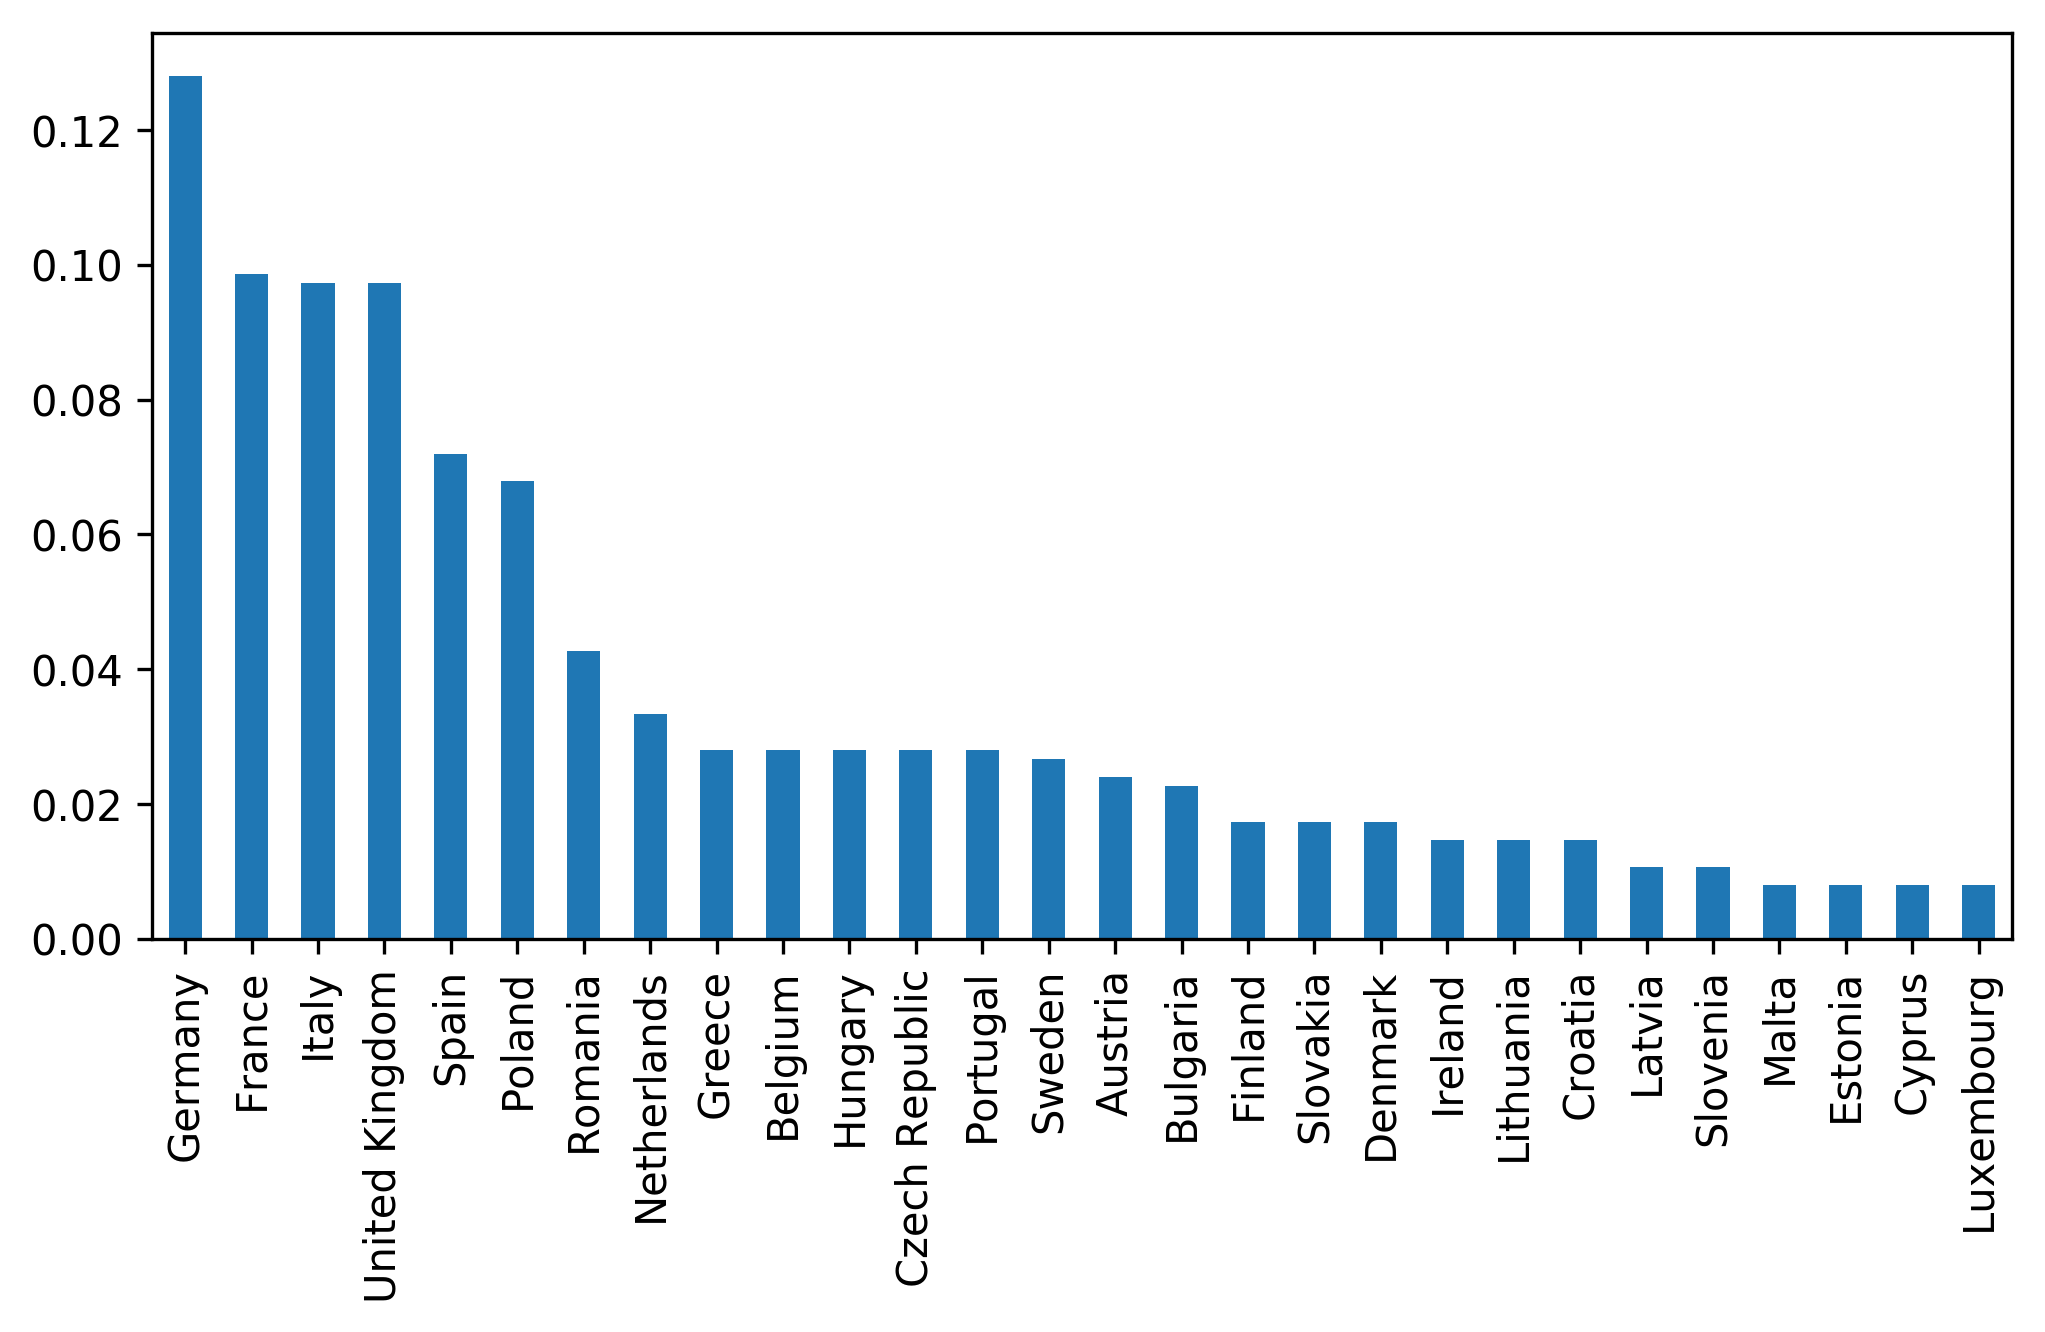

In [170]:
y_mem = members.country
data_mem = members.fullName
plt.figure(figsize=(8, 4))
(y_mem.value_counts() / y_mem.size).plot(kind='bar')

In [181]:
y_mem.value_counts()[:8]

Germany           96
France            74
Italy             73
United Kingdom    73
Spain             54
Poland            51
Romania           32
Netherlands       25
Name: country, dtype: int64

In [183]:
large = y_mem.value_counts()[:8].index
large

Index(['Germany', 'France', 'Italy', 'United Kingdom', 'Spain', 'Poland',
       'Romania', 'Netherlands'],
      dtype='object')

In [184]:
mask = y_mem.isin(large)
data_mem = data_mem[mask]
y_mem = y_mem[mask]

In [186]:
(y_mem.value_counts() / y_mem.size)

Germany           0.200837
France            0.154812
United Kingdom    0.152720
Italy             0.152720
Spain             0.112971
Poland            0.106695
Romania           0.066946
Netherlands       0.052301
Name: country, dtype: float64

In [190]:
data_mem.shape

(478,)

In [187]:
text_mem_train, text_mem_test, y_mem_train, y_mem_test = train_test_split(data_mem, y_mem, stratify=y_mem, random_state=0)

In [191]:
bow_pipe = make_pipeline(CountVectorizer(), LogisticRegressionCV())
cross_val_score(bow_pipe, text_mem_train, y_mem_train, cv=5, scoring='f1_macro')

/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-s

array([ 0.231,  0.241,  0.236,  0.28 ,  0.254])

In [194]:
char_pipe = make_pipeline(CountVectorizer(analyzer="char_wb"), LogisticRegressionCV())
cross_val_score(char_pipe, text_mem_train, y_mem_train, cv=5, scoring='f1_macro')

/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-s

array([ 0.452,  0.459,  0.341,  0.469,  0.418])

In [196]:
char_pipe = make_pipeline(CountVectorizer(analyzer="char_wb", ngram_range=(1, 4)), LogisticRegressionCV())
cross_val_score(char_pipe, text_mem_train, y_mem_train, cv=5, scoring='f1_macro')

/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([ 0.596,  0.64 ,  0.588,  0.627,  0.526])

In [197]:
char_pipe.fit(text_mem_train, y_mem_train)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='char_wb', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,...2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

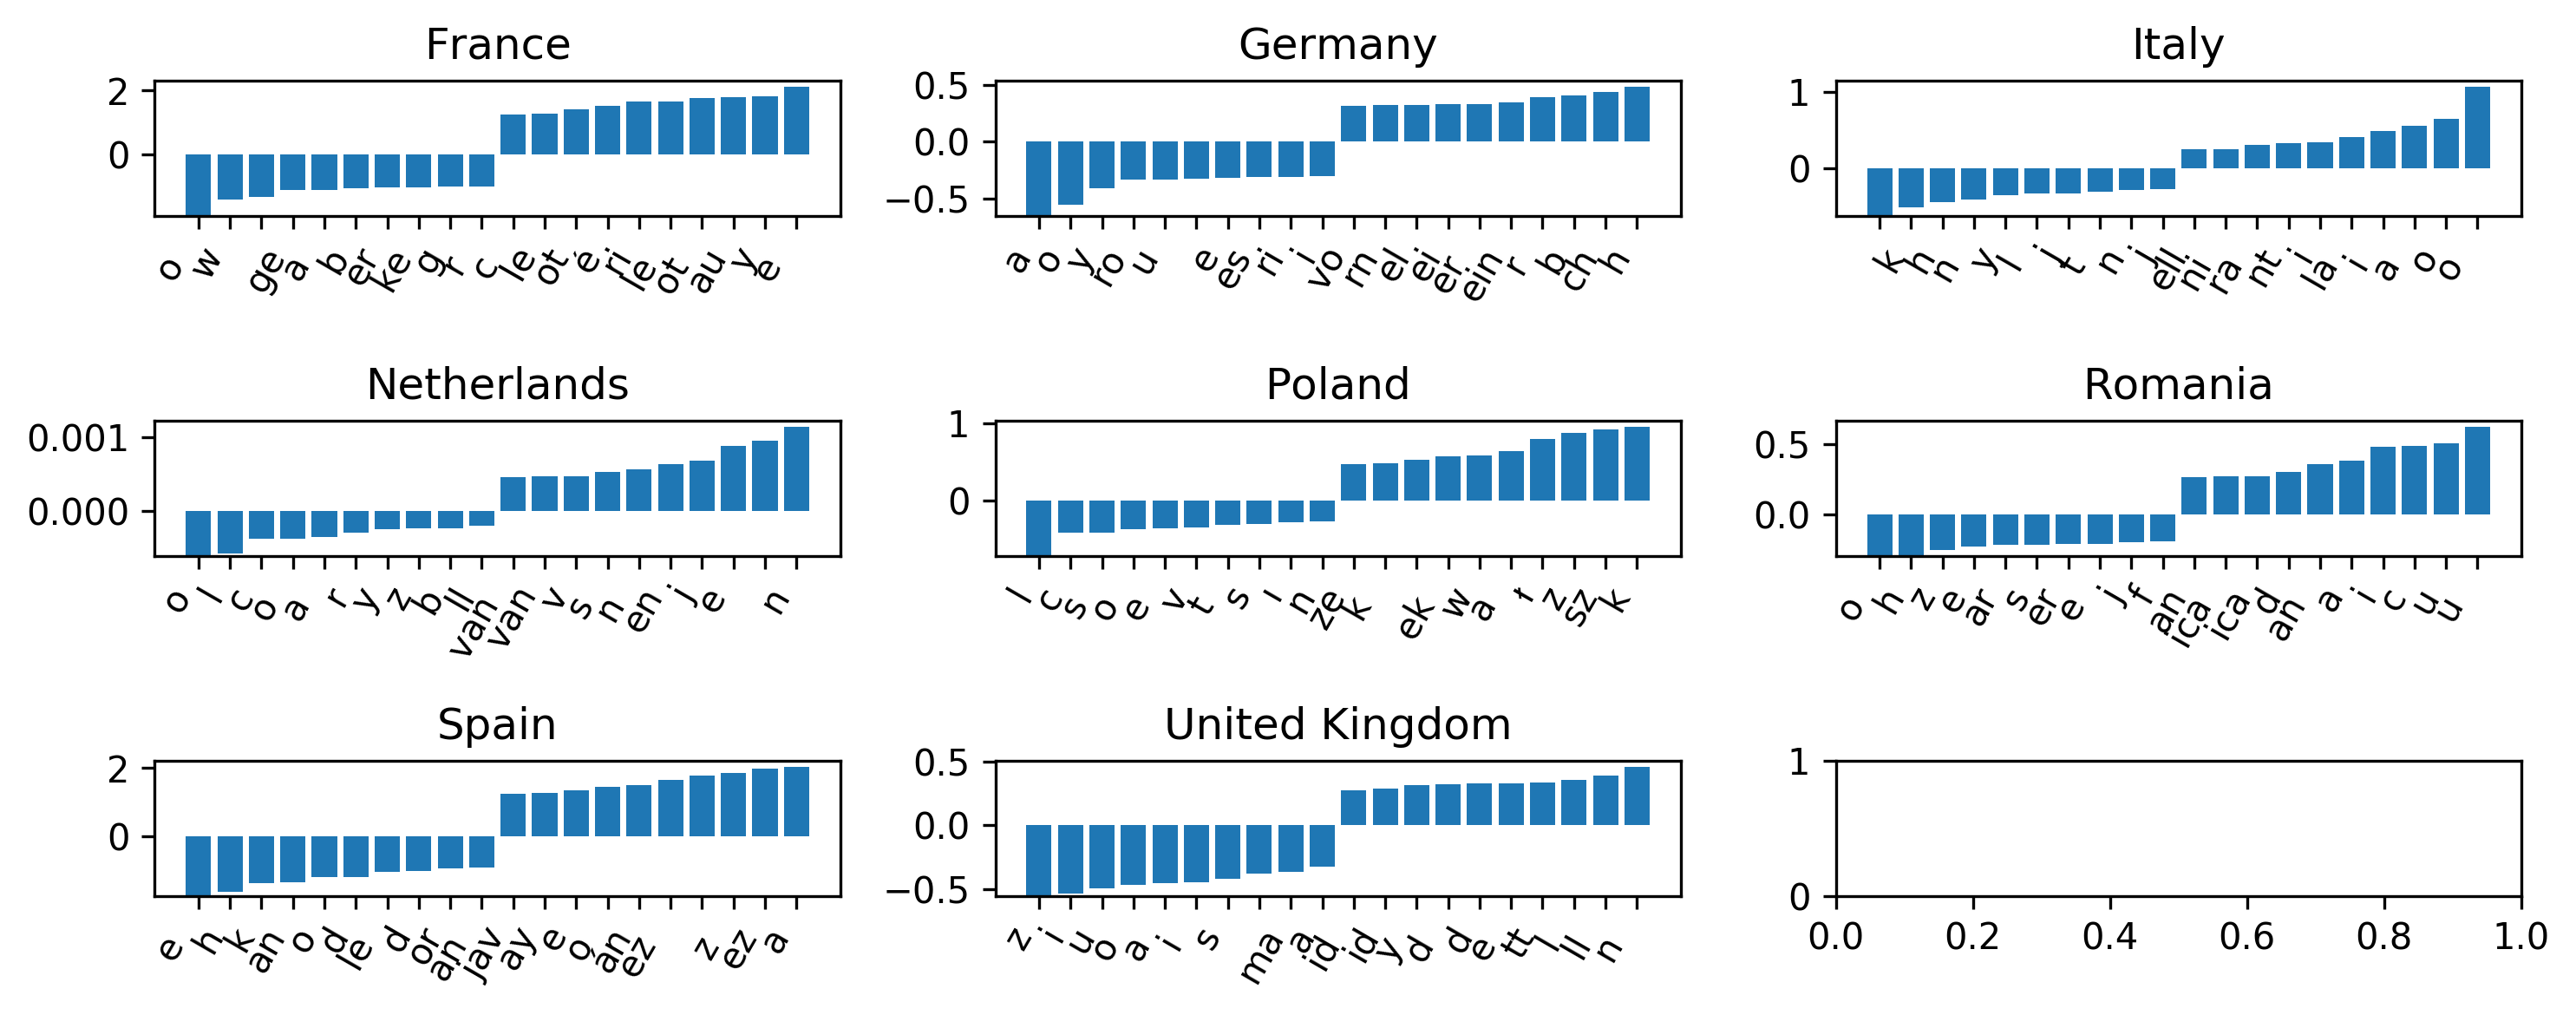

In [204]:
lr = char_pipe.named_steps['logisticregressioncv']
feature_names = np.array(char_pipe.named_steps['countvectorizer'].get_feature_names())
n_classes = len(lr.classes_)
fig, axes = plt.subplots(n_classes // 3 + 1, 3, figsize=(10, 4))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, feature_names, top_n=10, ax=ax)
    
plt.tight_layout()

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

param_grid = {"logisticregression__C": [100, 10, 1, 0.1, 0.001],
              "countvectorizer__ngram_range": [(1, 1), (1, 2), (1, 5), (1, 7),
                                               (2, 3), (2, 5), (3, 8), (5, 5)],
              "countvectorizer__min_df": [1, 2, 3],
              "normalizer": [None, Normalizer()]
             }
grid = GridSearchCV(make_pipeline(CountVectorizer(analyzer="char"), Normalizer(), LogisticRegression()),
                    param_grid=param_grid, cv=10, scoring="f1_macro"
                   )


In [260]:
grid.fit(text_mem_train, y_mem_train)

/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/andy/checkout/scikit-learn/sklearn/metrics/classification.py:1118: UndefinedMetricWarning: F-s

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.001], 'countvectorizer__min_df': [1, 2, 3], 'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 5), (1, 7), (2, 3), (2, 5), (3, 8), (5, 5)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_macro', verbose=0)

In [261]:
grid.best_score_

0.58255198397046815

In [262]:
grid.best_params_

{'countvectorizer__min_df': 2,
 'countvectorizer__ngram_range': (1, 5),
 'logisticregression__C': 10}

In [264]:
results = pd.DataFrame(grid.cv_results_)
res_pivot = results.pivot_table(values=['mean_test_score', 'mean_train_score'],
                                index=["param_countvectorizer__ngram_range", "param_logisticregression__C",
                                       "param_countvectorizer__min_df"])

In [280]:
res_pivot.mean_test_score

param_countvectorizer__ngram_range  param_logisticregression__C  param_countvectorizer__min_df
(1, 1)                              0.001                        1                                0.141167
                                                                 2                                0.141167
                                                                 3                                0.141167
                                    0.100                        1                                0.448270
                                                                 2                                0.441997
                                                                 3                                0.437624
                                    1.000                        1                                0.480549
                                                                 2                                0.482002
                                                 

MultiIndex(levels=[[1, 2, 3], [0.001, 0.1, 1.0, 10.0, 100.0]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['param_countvectorizer__min_df', 'param_logisticregression__C'])

In [295]:
bla = res_pivot.mean_test_score.unstack(["param_countvectorizer__ngram_range"])
bla = bla.swaplevel().sort_index()
bla.index.names = ['min_df', 'C']
bla.style.background_gradient(cmap="viridis")

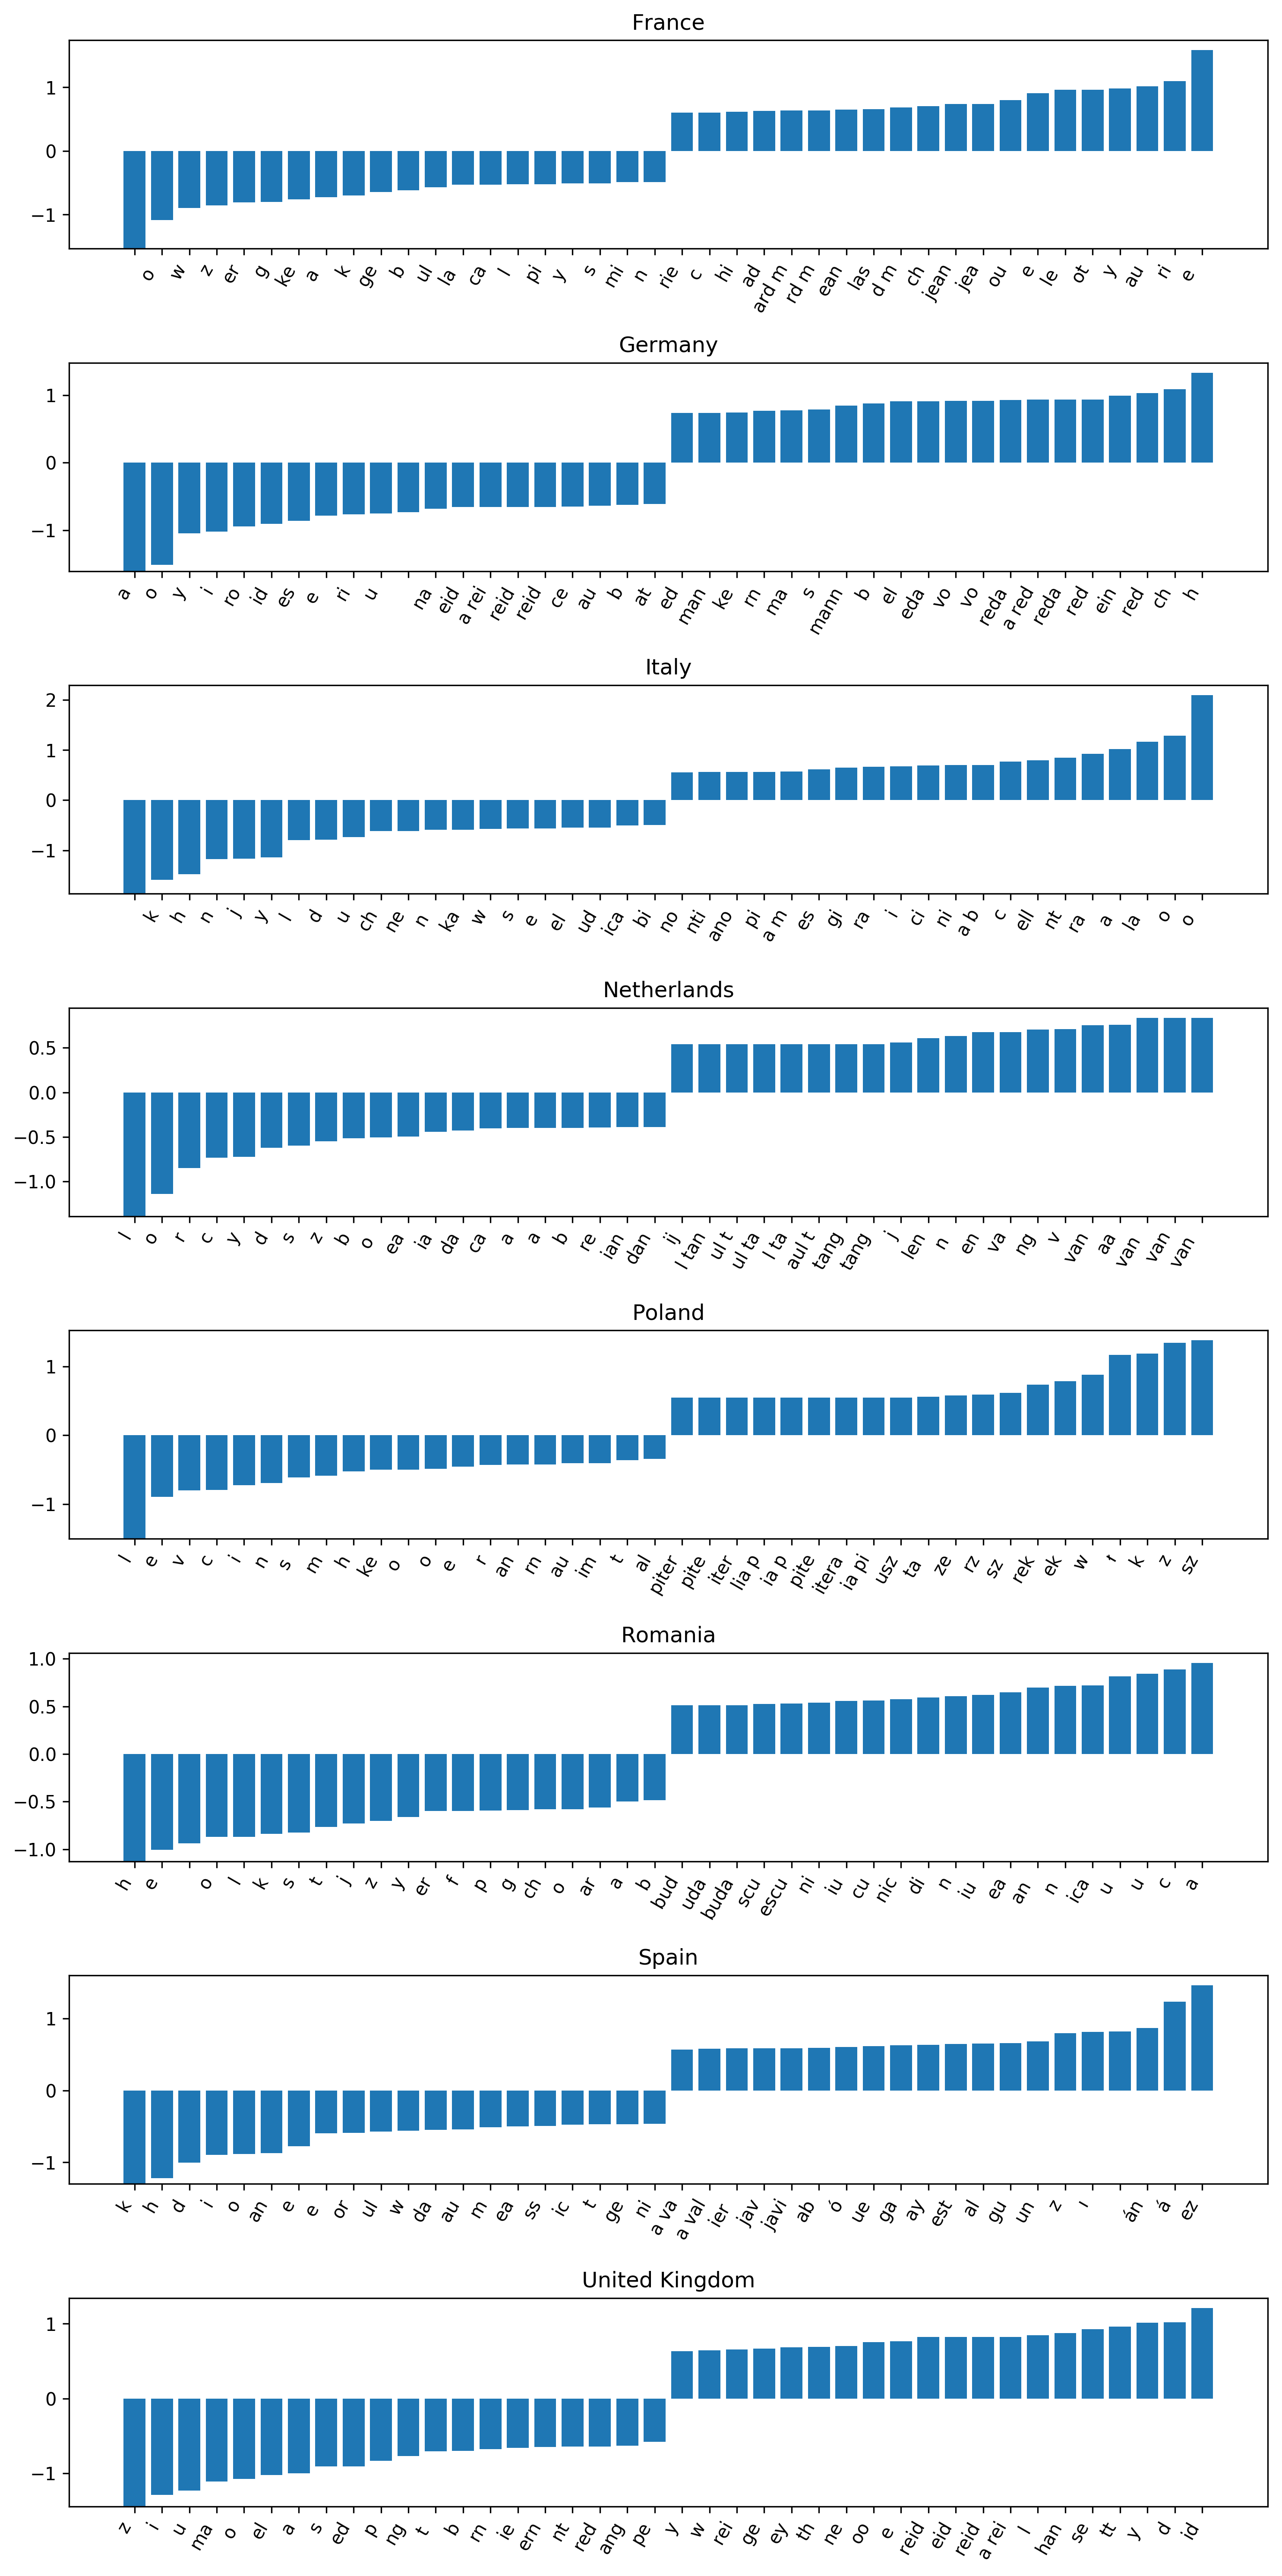

In [238]:
lr = grid.best_estimator_.named_steps['logisticregression']
feature_names = np.array(grid.best_estimator_.named_steps['countvectorizer'].get_feature_names())
n_classes = len(lr.classes_)
fig, axes = plt.subplots(n_classes, figsize=(10, 20))
for ax, coef, label in zip(axes.ravel(), lr.coef_, lr.classes_):
    ax.set_title(label)
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

# Hashing Vectorizer

In [298]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X_train = hv.transform(text_train_sub)
X_val = hv.transform(text_val)

In [299]:
X_train.shape

(18750, 1048576)

In [300]:
lr = LogisticRegressionCV().fit(X_train, y_train_sub)
lr.score(X_val, y_val)

0.87775999999999998